# Unsupervised Customer Segmentation Using Transactional Data and Clustering Techniques.

Dataset:

--Source: UCI Machine Learning Repository Online Retail dataset.

--Data origin: UK-based online retail company, all-occasion gifts.

--Period covered: December 2010 → December 2011.

--Type: tabular transactional data (categorical + numeric), with customer-level features engineered (notably RFM) for clustering.


### 0. Setup: imports & drive

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Confirm the zip exists.
import os

zip_path = "/content/drive/MyDrive/online+retail.zip"
os.path.exists(zip_path)


True

In [8]:
# Unzip the dataset.

import zipfile

extract_path = "/content/drive/MyDrive/online+retail"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped files:", os.listdir(extract_path))


Unzipped files: ['Online Retail.xlsx']


In [9]:
# Load the excel File.

import pandas as pd

FILE_PATH = "/content/drive/MyDrive/online+retail/Online Retail.xlsx"

df_raw = pd.read_excel(FILE_PATH)

print("Loaded shape:", df_raw.shape)
df_raw.head()

Loaded shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 1. RAW Data Info & Description

In [10]:
print("===== RAW DATA INFO =====")
df_raw.info()

print("\n===== RAW DATA DESCRIPTION (NUMERIC) =====")
display(df_raw.describe())

print("\n===== RAW DATA DESCRIPTION (ALL) =====")
display(df_raw.describe(include="all"))

print("\n===== RAW MISSING VALUES =====")
display(df_raw.isna().sum().sort_values(ascending=False))

print("\n===== RAW DUPLICATES =====")
print("Duplicate rows:", df_raw.duplicated().sum())

===== RAW DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

===== RAW DATA DESCRIPTION (NUMERIC) =====


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303



===== RAW DATA DESCRIPTION (ALL) =====


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN



===== RAW MISSING VALUES =====


,0
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0



===== RAW DUPLICATES =====
Duplicate rows: 5268


### 2. Data Preprocessing

In [11]:
df = df_raw.copy()

In [12]:
# 1. Drop missing CustomerID
df = df.dropna(subset=["CustomerID"]).copy()
df["CustomerID"] = df["CustomerID"].astype(int)

In [13]:
# 2. Convert InvoiceDate
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [14]:
# 3. Remove cancellations (InvoiceNo starting with 'C')
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df = df[~df["InvoiceNo"].str.startswith("C")].copy()

In [15]:
# 4. Remove invalid Quantity and UnitPrice
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)].copy()

In [16]:
# 5. Remove duplicates
df = df.drop_duplicates()

In [17]:
# 6. Create TotalPrice
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [18]:
print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (392692, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### 3. Cleaned Data Info & Description.

In [19]:
print("===== CLEANED DATA INFO =====")
df.info()

===== CLEANED DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [20]:
print("\n===== CLEANED DATA DESCRIPTION =====")
display(df.describe())


===== CLEANED DATA DESCRIPTION =====


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [21]:
print("\n===== CLEANED MISSING VALUES =====")
display(df.isna().sum().sort_values(ascending=False))


===== CLEANED MISSING VALUES =====


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


In [22]:
print("\n===== DATE RANGE =====")
print("From:", df["InvoiceDate"].min())
print("To  :", df["InvoiceDate"].max())


===== DATE RANGE =====
From: 2010-12-01 08:26:00
To  : 2011-12-09 12:50:00


In [23]:
print("\n===== TOP COUNTRIES =====")
display(df["Country"].value_counts().head(10))


===== TOP COUNTRIES =====


,count
Country,
United Kingdom,349203
Germany,9025
France,8326
EIRE,7226
Spain,2479
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1453


### 4. Exploratory Data Analysis (EDA)

#### 4.1 Dataset Overview

In [24]:
print("Unique customers :", df["CustomerID"].nunique())
print("Unique invoices  :", df["InvoiceNo"].nunique())
print("Unique products  :", df["StockCode"].nunique())
print("Total revenue    :", df["TotalPrice"].sum())

Unique customers : 4338
Unique invoices  : 18532
Unique products  : 3665
Total revenue    : 8887208.894


#### 4.2 Top Countries by Transactions

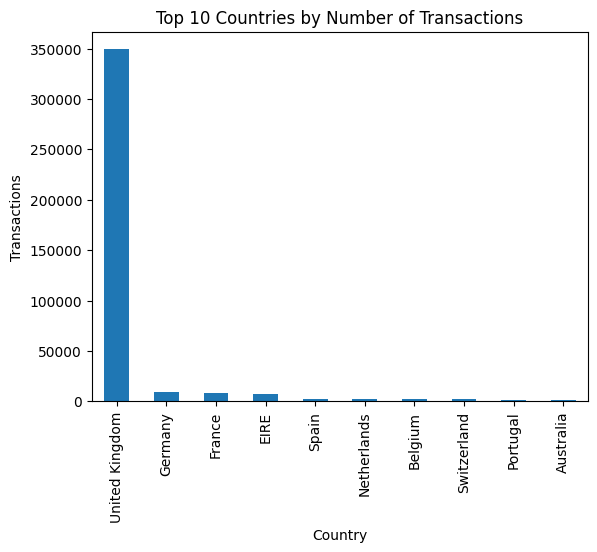

In [25]:
top_countries = df["Country"].value_counts().head(10)

plt.figure()
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Country")
plt.ylabel("Transactions")
plt.show()

#### 4.3 Monthly Revenue Trend

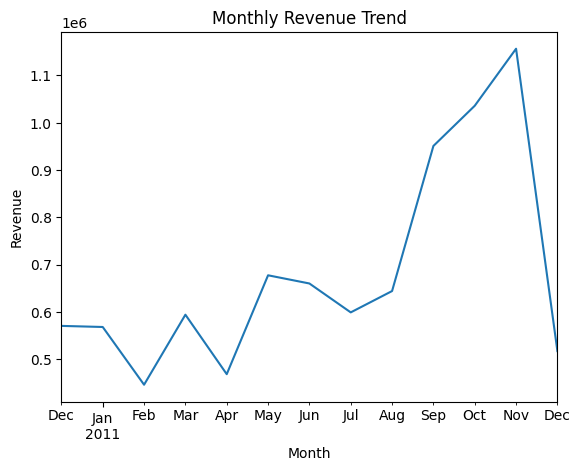

In [26]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M").dt.to_timestamp()
monthly_revenue = df.groupby("InvoiceMonth")["TotalPrice"].sum()

plt.figure()
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

#### 4.4 Quantity & Price Distributions

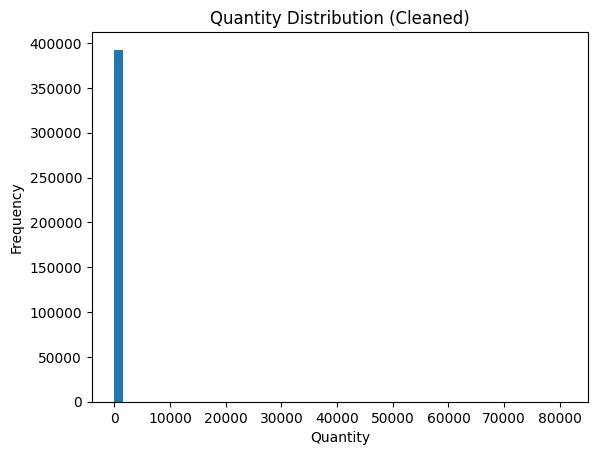

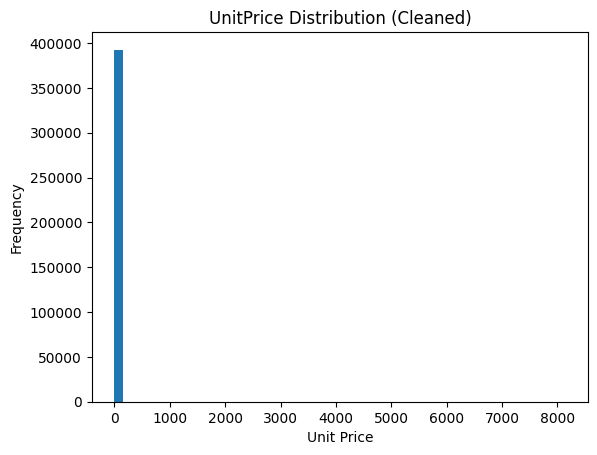

In [27]:
plt.figure()
df["Quantity"].plot(kind="hist", bins=50)
plt.title("Quantity Distribution (Cleaned)")
plt.xlabel("Quantity")
plt.show()

plt.figure()
df["UnitPrice"].plot(kind="hist", bins=50)
plt.title("UnitPrice Distribution (Cleaned)")
plt.xlabel("Unit Price")
plt.show()

#### 4.5 Top Products by Revenue

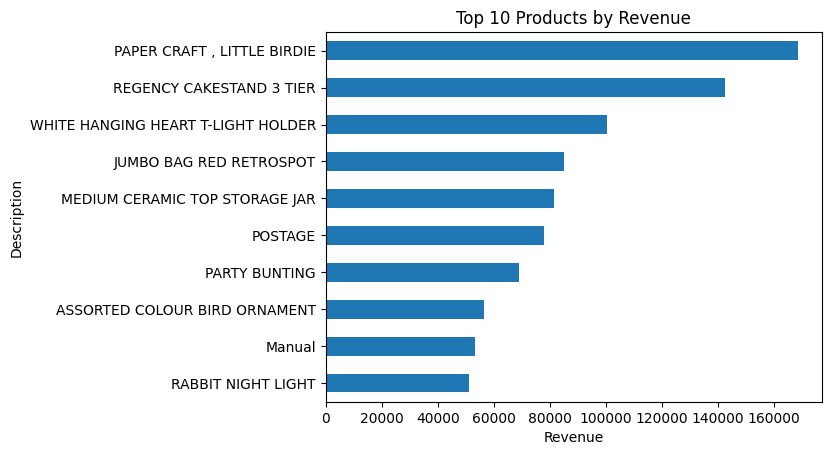

In [28]:
top_products = (
    df.groupby("Description")["TotalPrice"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top_products.sort_values().plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

### 5. Modeling-Ready Dataset

In [29]:
# Reference date (1 day after last purchase)
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = (
    df.groupby("CustomerID")
      .agg(
          Recency=("InvoiceDate", lambda x: (ref_date - x.max()).days),
          Frequency=("InvoiceNo", "nunique"),
          Monetary=("TotalPrice", "sum")
      )
      .reset_index()
)

print("RFM shape:", rfm.shape)
rfm.head()

RFM shape: (4338, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [30]:
print("===== RFM INFO =====")
rfm.info()

print("\n===== RFM DESCRIPTION =====")
display(rfm.describe())

===== RFM INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   int64  
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 135.7 KB

===== RFM DESCRIPTION =====


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,306.482500
50%,15299.500000,51.000000,2.000000,668.570000
75%,16778.750000,142.000000,5.000000,1660.597500
max,18287.000000,374.000000,209.000000,280206.020000


#### Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

rfm_model = rfm.copy()
rfm_model["Frequency"] = np.log1p(rfm_model["Frequency"])
rfm_model["Monetary"]  = np.log1p(rfm_model["Monetary"])

X = rfm_model[["Recency", "Frequency", "Monetary"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape


(4338, 3)